<h1>Questions to be handed in on first and second derivatives and their relationships</h1>

<h2>Exploring first and second derivatives with Julia:</h2>

<p>To get started, we load the <code>MTH229</code> package:</p>

In [1]:
# load MTH229 package one way or the other
using Pkg
if haskey(Pkg.installed(), "MTH229")
    using MTH229
else
    try
        Pkg.add(PackageSpec(url="https://github.com/mth229/MTH229.jl", rev="master"))
        using MTH229
    catch err
        include(download("https://raw.githubusercontent.com/mth229/MTH229.jl/master/src/229.jl"))
    end
end

<p>Recall, the <code>MTH229</code> package overloads <code>&#39;</code> so that the same prime notation of mathematics is available in <code>Julia</code> for indicating derivatives of functions.</p>

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/first-second-derivatives.html">Exploring first and second derivatives with Julia</a>.</p>

<p>For the impatient, this assignment looks at the relationship between a function, $f(x)$, and its first and second derivatives: $f'(x)$ and $f''(x)$. The basic relationship can be summarized (though the devil is in the details) by:</p>

<ul>
<li><p>If the first derivative is <em>positive</em> on $(a,b)$ then the function is <em>increasing</em> on $(a,b)$.</p>
</li>
<li><p>If the second derivative is <em>positive</em> on $(a,b)$ then the function is <em>concave up</em> on $(a,b)$.</p>
</li>
</ul>

<p>(The "devil" here is that the converse statements are usually - but not always - true.)</p>

<p>Some key  definitions are:</p>

<ul>
<li><p>A <strong>critical</strong> point of $f$ is a value in the domain of $f(x)$ for</p>
</li>
</ul>

<p>which the derivative is $0$ or undefined. These are often–-but <strong>not always</strong>–-where $f(x)$ has a local maximum or minimum.</p>

<ul>
<li><p>An <strong>inflection point</strong> of $f$ is a value in the domain of $f(x)$</p>
</li>
</ul>

<p>where the concavity of $f$ <em>changes</em>. (These are <em>often</em>–-but <strong>not always</strong>–-where $f''(x)=0$.)</p>

<p>These two relationships and definitions are put to use to characterize <em>local extrema</em> of a function via one of two "derivative" tests:</p>

<ul>
<li><p>The <strong>first derivative test</strong>:  This states that for a differentiable function</p>
</li>
</ul>

$f(x)$

<p>with a critical point at $c$ then if $f'(x)$ changes sign from $+$ to $-$ at $c$ then $f(c)$ is a local maximum and if $f'(x)$ changes sign from $-$ to $+$ then $f(c)$ is a local minimum.</p>

<ul>
<li><p>The <strong>second derivative test</strong>: This states that if $c$ is a critical point of</p>
</li>
</ul>

$f(x)$

<p>and $f''(c) > 0$ then $f(c)$ is a local minimum and if $f''(c) < 0$ then $f(c)$ is a local maximum.</p>

<hr />

<p>We investigate these concepts in <code>Julia</code> first graphically, and then numerically.</p>

<p>For the graphical exploration, the following function is quite useful. It is used to plot a function <code>f</code> using two colors; the color choice depending on whether the second function, <code>g</code> is positive or not. This function is in the <code>MTH229</code> package.</p>

In [1]:
function plotif(f, g, a, b)
  plot([f, x -> g(x) > 0.0 ? f(x) : NaN], a, b, linewidth=5)
end

<p>This function can be used to graphically illustrate where the graph of <code>f</code> is <em>positive</em>, <em>increasing</em>, or <em>concave up</em>: <code>plotif&#40;f, f, a, b&#41;</code> will show a different color when $f(x)$ is <em>positive</em>, <code>plotif&#40;f, f&#39;, a, b&#41;</code> will show a different color when $f(x)$ is <em>increasing</em>, and  <code>plotif&#40;f, f&#39;, a, b&#41;</code> will show a different color when $f(x)$ is <em>concave up</em>. For example, here we see where the following <code>f</code> is increasing:</p>

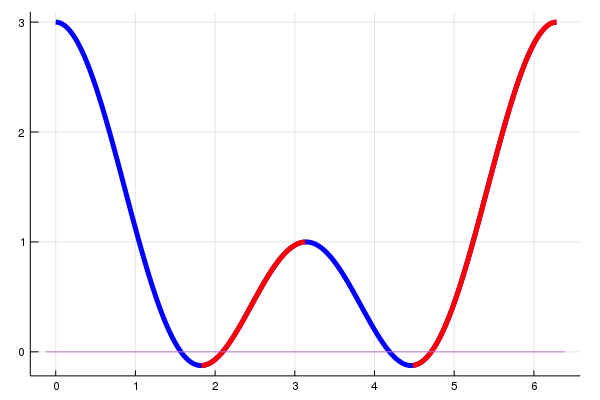

In [1]:
f(x) = 1 + cos(x) + cos(2x)
plotif(f, f', 0, 2pi)  # color increasing
plot!(zero)

<hr />

<p>Once eyes are trained to identify zeros, critical points, or inflection points of a function, we can use numeric methods to zoom in on more accurate values.  Recall, <code>fzero&#40;f, a, b&#41;</code> will find a zero of <code>f</code> <strong>if</strong> <code>&#91;a,b&#93;</code> is a <em>bracketing</em> interval (<code>f</code> takes different signs at the endpoints); and <code>fzeros&#40;f, a, b&#41;</code> will look for all zeros of <code>f</code> within the interval <code>&#91;a,b&#93;</code>, not necessarily a bracketing one. The <code>fzeros</code> function returns a container of values, which may, of course, be empty.</p>

<p>For example to find a zero in <code>f</code> near <code>1.5</code> we would first graph. We can then identify $[1,2]$ as a bracketing interval, as solve with:</p>

In [1]:
f(x) = 1 + cos(x) + cos(2x)
fzero(f, 1, 2)

1.5707963267948966

<p>If our task was to get <em>all</em> critical points of <code>f</code> in the interval $(0, 2\pi)$, then <code>fzeros</code> is the easier-to-use choice: As <code>f</code> is continuously differentiable, all critical points are given by solving $f'(x)=0$:</p>

In [1]:
zs = fzeros(f', 0, 2pi)

5-element Array{Float64,1}:
 0.0               
 1.8234765819369751
 3.141592653589793 
 4.459708725242611 
 6.283185307179586 

<p>The answer from <code>fzeros</code> is a vector of values. You can get individual ones different ways or work with them all at once. For example, here is the function's value at each of the critical points:</p>

In [1]:
f.(zs)   # or more explicitly map(f, zs)

5-element Array{Float64,1}:
  3.0  
 -0.125
  1.0  
 -0.125
  3.0  

<h3>Questions</h3>

<h4>Graphical explorations</h4>

<ul>
<li><p>The <code>airyai</code> function is a <em>built-in</em> function that is important for some applications. It is likely to be unfamiliar. Make a graph using <code>plotif</code> to investigate when the <code>airyai</code> function is positive on the interval $(-5,5)$. Your answer should use interval notation. What is your answer? (Recall, when the second function passed to <code>plotif</code> is positive, the graph uses a different color, so you need to think about what function that should be.)</p>
</li>
</ul>

&#10054; $(-4.08, -2.33)$
&#10054;  $(-4.82, -3,24)$ and $(-1.01, 5)$
&#10054;  $(-5, -4.08)$ and $(-2.33, 5)$
&#10054;  $(-5, -4.82)$ and $(-3.24, -1.01)$



<ul>
<li><p>Make a graph using <code>plotif</code> to identify when the function $f(x)=x^x$ is <em>increasing</em> on the interval $(0,2)$.</p>
</li>
</ul>

&#10054; $(0, 2)$
&#10054; The function is always decreasing
&#10054; $(0, 0.37)$
&#10054; $(0.37, 2)$



<ul>
<li><p>Make a graph using <code>plotif</code> to investigate when the function</p>
</li>
</ul>


$$
f(x) = \frac{x}{x^2+9}
$$


<p>is <em>concave up</em> on the interval $(-10,10)$.</p>

<p>Is $f(x)$ concave up at $x=-3$?</p>

&#10054; Yes
&#10054; No



<p>Is $f(x)$ concave up at $x=3$?</p>

&#10054; Yes
&#10054; No



<ul>
<li><p>Make a graph using <code>plotif</code> to identify any <em>critical points</em> of $f(x) = x \ln(x)$ on the interval $(0,4)$. Points where the function changes from increasing to decreasing will be critical points (though there may be others).</p>
</li>
</ul>

<p>Which are the critical points?</p>

&#10054; $1.0$
&#10054; $0, 1.0$
&#10054; $0.3678$
&#10054; $0, 0.3678$
&#10054; There are no critical points in this interval



<ul>
<li><p>Make a graph using <code>plotif</code> to identify any <em>inflection points</em> of $f(x) = \sin(x) - x$ over the interval $(-5,5)$.</p>
</li>
</ul>

<p>The inflection points occur at:</p>

&#10054; $0$
&#10054; $-3.14, 3.14$
&#10054; $-3.14, 0, 3.14$
&#10054; $3.14$



<ul>
<li><p>The following graph models (on some exaggerated scale) one period of an electrocardiogram graph over the interval $[-5,5]$. The graph consists of two round parts and several straight-line segments.</p>
</li>
</ul>

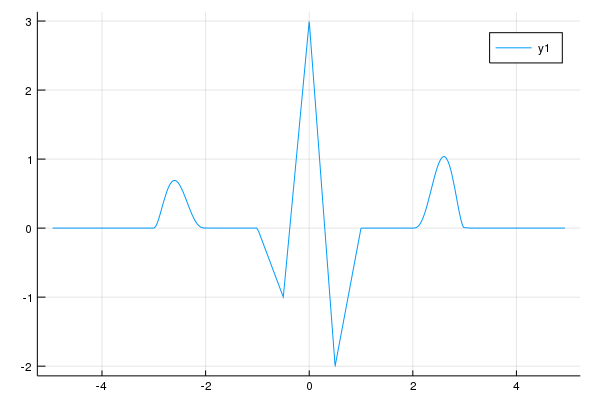

<p>This function, call it $f$, has critical points at $x=-2.55..., -1, -1/2, 0, 1/2, 1,$ and  $2.67...$.</p>

<p>Why is there a critical point at $c=-2.55$?</p>

&#10054; This is because $f(c) = 0$.
&#10054; This is because $f'(c) = 0$.
&#10054; This is because $f'(c)$ does not exist
&#10054; This is because $f''(c) = 0$.
&#10054; This is because $f''(c)$ does not exist



<p>Why is there are a critical point at $c=0$?</p>

&#10054; This is because $f(c) = 0$.
&#10054; This is because $f'(c) = 0$.
&#10054; This is because $f'(c)$ does not exist
&#10054; This is because $f''(c) = 0$.
&#10054; This is because $f''(c)$ does not exist



<ul>
<li><p>For any polynomial $p(x)$, between any two consecutive zeros there must be a critical point, perhaps more than one.</p>
<p>For $p(x) =x^4 + x^3 - 7x^2 - x + 6$, there are zeros $-3$, $-1$, $1$ and $2$. Using <code>plotif</code>, identify which critical point(s) are in $[-1, 1]$?</p>
</li>
</ul>

&#10054; $-0.07046$
&#10054; $-0.72, 0.75$
&#10054; $0$
&#10054; $0, 0.25, 0.57$
&#10054; There are no critical points, as p(x) is not 0 in (-1,1)



<h4>Finding more precise numeric values</h4>

<ul>
<li><p>Use <code>fzero</code> or <code>fzeros</code> to numerically identify all <em>critical points</em> to the</p>
</li>
</ul>

<p>function $f(x) = 2x^3 - 6x^2 - 2x + 4$. (There are no more than $2$.)</p>

&#10054; $-0.154701, 2.1547$
&#10054; $0.745898, 3.11491$
&#10054; $-0.860806, 0.745898, 3.11491$
&#10054; $1$



<ul>
<li><p>Use <code>fzero</code> of <code>fzeros</code> to numerically identify all <em>inflection points</em> for the function $f(x) = \ln(x^2 + 2x + 5)$.</p>
</li>
</ul>

&#10054; There are none
&#10054; There is one at $x=-1.0$
&#10054; There is one at $x=1.0$ and one at $x=-3.0$
&#10054; There is one at each of $x=-4.4641$, $-1.0$, and $2.4641$



<ul>
<li><p>Numerically identify all <em>critical points</em> to the rational function $f(x)$ defined below. Graphing is useful to identify where the possible values are. (A critical point by definition is in the domain of the function.)</p>
</li>
</ul>


$$
f(x) = \frac{(x-3)\cdot (x-1)\cdot (x+1)\cdot (x+3)}{(x-2)\cdot (x+2)}.
$$


&#10054; $-3, -1, 1, 3$
&#10054; $-2.44949, 2.44949$
&#10054; $0$
&#10054; $-2, 2$



<ul>
<li><p>Suppose the first derivative of $f$ is $f'(x) = x^3 - 6x^2 + 11x - 6$. Where is $f(x)$ increasing? Use interval notation in your answer.</p>
</li>
</ul>

&#10054; It is always increasing
&#10054;  $(-\infty, 1.42265)$ and $(2.57735, \infty)$
&#10054;  $(2.0, \infty)$
&#10054;  $(1.0, 2.0)$ and  $(3.0, \infty)$



<ul>
<li><p>Suppose the second derivative of $f$ is $f''(x) = x^2 - 3x + 2$. Where is $f(x)$ concave up? Use interval notation in your answer.</p>
</li>
</ul>

&#10054;  $(-\infty, 1.0)$ and $(2.0, \infty)$
&#10054;  $(1.0, 2.0)$
&#10054;  $(-\infty, \infty)$ -- it is always concave up
&#10054;  $(1.5, \infty)$



<h3>The first derivative test</h3>

<p>The first derivative test classifies critical points by identifying if the function changes sign at these critical points. If it does, then there is either a maximum or minimum. Here is an example for the function $f(x) = x^3 \cdot (x-2)^2$. We first find the critical points as follows:</p>

In [1]:
f(x) = x^3 * (x-2)^2
cps = fzeros(f', -5, 5)

3-element Array{Float64,1}:
 8.129871197923565e-40
 1.2                  
 2.0                  

<p>There are three. We need to see if <code>f</code> changes sign between them. We can do so by choosing <em>test</em> points. These are points between the critical points. As $f'(x)$ is <em>continuous</em> it can only change sign at a critical point, so a test point determines the sign of $f'(x)$ between an adajacent pair of critical points. Here we arbitrarily pick test points and then evaluate $f'$ on them:</p>

In [1]:
test_pts = [-1, 1, 1.5, 3]
f'.(test_pts)     # or map(f', test_pts)

4-element Array{Float64,1}:
 33.0   
  1.0   
 -1.6875
 81.0   

<p>At the critical point $x=0$ there is no sign change, so no relative maximum or minimum; at $x=1.2$ we have a change of sign from positive to negative, so we have a relative <em>maximum</em> at $x=1.2$; finally, at $x=3$ we have a change of sign from negative to postive, so there is a relative <em>minimum</em> at $x=3$.</p>

<hr />

<ul>
<li><p>For a function $f(x)$ suppose all you know is that $f'(x)=x^3-5x^2+8x-4$.</p>
</li>
</ul>

<p>Using this, find <em>all</em> the critical points of $f(x)$. Use the first derivative test to classify them as local extrema–-<em>if</em> you can. If you can't say why.</p>

<p>In <code>Julia</code>, why can't you simply define <code>f&#39;&#40;x&#41; &#61; x^3 - 5x^2&#43;8x-4</code>?</p>

&#10054; You can't, as only a variable, a function definition, or indexing can be on the right-hand side of the equals sign. That expression would have a function call---the derivative of `f` evaluated at `x`.
&#10054; You can, it is just like math



<p>Define a function <code>fp&#40;x&#41; &#61; x^3 - 5x^2&#43;8x-4</code> to represent the derivative of $f(x)$. What command will find all critical points of $f(x)$?</p>

&#10054; `fzeros(fp'', -10, 10)`
&#10054; None of the above, as a graph will illustrate
&#10054; `fzeros(fp, -10, 10)`
&#10054; `fzeros(fp', -10, 10)`



<p>Consider the point $x=0$. What can be said?</p>

&#10054; It is not a critical point
&#10054; It is a critical point, the derivative changes sign from positive to negative, so $f$ has a relative maximum there
&#10054; It is a critical point, the derivative changes sign from negative to positive, so $f$ has a relative minimum there
&#10054; It is a critical point, the derivative does not change sign, so $f$ does not have a relative extrema there



<p>Consider the point $x=1$. What can be said?</p>

&#10054; It is not a critical point
&#10054; It is a critical point, the derivative does not change sign, so $f$ does not have a relative extrema there
&#10054; It is a critical point, the derivative changes sign from positive to negative, so $f$ has a relative maximum there
&#10054; It is a critical point, the derivative changes sign from negative to positive, so $f$ has a relative minimum there



<p>Consider the point $x=2$. What can be said?</p>

&#10054; It is not a critical point
&#10054; It is a critical point, the derivative changes sign from negative to positive, so $f$ has a relative minimum there
&#10054; It is a critical point, the derivative changes sign from positive to negative, so $f$ has a relative maximum there
&#10054; It is a critical point, the derivative does not change sign, so $f$ does not have a relative extrema there



<h3>The second derivative test</h3>

<p>The second derivative test is easier to apply in <code>Julia</code>, but in general less powerful than the first derivative test. If you know the critical points, you only need to evaluate the second derivative on them. Here is an example for $f(x) = x^4 -4x^3$:</p>

In [1]:
f(x) = x^4 - 4x^3
cps = fzeros(f', -5, 5)
f''.(cps)

2-element Array{Float64,1}:
 -3.650260694503735e-38
 36.0                  

<p>The critical point $x=0$ has $f''(0) = 0$, so the second derivative test is <em>inconclusive</em>, however the critical point $x=2$ has $f''(2) > 0$, so the second derivative test says $f(x)$ has a relative <em>minimum</em> at $x=2$.</p>

<ul>
<li><p>Suppose the first derivative of $f$ is $f'(x) = (x^2 - 2) \cdot e^{-x}$. First find the critical points of $f(x)$, then use the second derivative test to classify them.</p>
</li>
</ul>

<p>The critical points are:</p>

&#10054; $-0.732051, 2.73205$
&#10054; $-0.732051$
&#10054; $-1.41421, 1.41421$
&#10054; $0.0$



<p>Classify your critical points using the second derivative test</p>

<ul>
<li><p>Suppose the first derivative of $f$ is $f'(x) = x^3 - 7x^2 + 14$. Based on  a plot over the interval $[-4, 8]$. On what subintervals is $f(x)$ increasing?</p>
</li>
</ul>

&#10054;  $(-\infty, 0)$
&#10054;  $(-\infty, 0)$ and $(6.69, \infty)$
&#10054;  $(-1.29, 1.61)$ and $(6.69, \infty)$
&#10054;  $(-\infty, 0)$ and $(4.67, \infty)$



<p>What did you use to find your last answer?</p>

&#10054;  $f'(x)  > 0$ on these subintervals
&#10054;  $f''(x) > 0$ on these subintervals
&#10054;  $f'(x)  < 0$ on these subintervals
&#10054;  $f''(x) < 0$ on these subintervals



<p>What are the $x$-coordinates of the relative minima of $f(x)$?</p>

&#10054;  $-1.29$ and $6.69$
&#10054; $4.56$
&#10054;  $-1.29$  and  $1.61$
&#10054;  $4.56$  and  $0$



<p>On what subintervals is $f(x)$ concave up?</p>

&#10054;  $(1.167, \infty)$
&#10054;  $(-\infty, 1.167)$
&#10054; It is always concave down
&#10054;  $(-\infty, 0)$  and $(4.67, \infty)$



<p>What did you use to decide?</p>

&#10054;  $f'(x)  > 0$ on these subintervals
&#10054;  $f''(x) > 0$ on these subintervals
&#10054;  $f'(x)  < 0$ on these subintervals
&#10054;  $f''(x) < 0$ on these subintervals



<p>Find the $x$ coordinates of the inflection points of $f(x)$.</p>

&#10054; At $0$  and  $4.67$
&#10054; $2.3333$
&#10054; Not listed
&#10054; $-1.29884, 1.61194, 6.6869$



<ul>
<li><p>Suppose you know the function $f(x)$ has the second derivative given by the <code>airyai</code> function. Use this to answer the following questions about $f(x)$ over the interval $(-5, 0)$.</p>
</li>
</ul>

<p>On what interval(s) is the function $f(x)$ positive?</p>

&#10054;  $(-5, -4.08795)$ and   $(-2.33811,0)$
&#10054;  $(-5, -4.8201)$ and   $(-3.2482, -1.01879)$
&#10054;  $(-4.83074, -3.27109)$ and  $(-1.17371, 0)$
&#10054; Can't tell.



<p>On what interval(s) is the function $f(x)$ increasing?</p>

&#10054;  $(-5, -4.08795)$ and $(-2.33811,0)$
&#10054;  $(-5, -4.8201)$ and $(-3.2482, -1.01879)$
&#10054;  $(-4.83074, -3.27109)$ and $(-1.17371, 0)$
&#10054; Can't tell.



<p>On what interval(s) is the function $f(x)$ concave up?</p>

&#10054;  $(-5, -4.08795)$ and $(-2.33811,0)$
&#10054;  $(-5, -4.8201)$ and $(-3.2482, -1.01879)$
&#10054;  $(-4.83074, -3.27109)$ and $(-1.17371, 0)$
&#10054; Can't tell.



<hr />

<ul>
<li><p>A simplified model for the concentration (micrograms/milliliter) of a certain slow-reacting antibiotic in the bloodstream $t$ hours after injection into muscle tissue is given by</p>
</li>
</ul>


$$
f(t) =  t^2 \cdot e^{-t/16}, \quad t \geq 0.
$$


<p>When will there be maximum concentration?</p>

<p>In the units given, how much is the maximum concentration?</p>

<p>When will the concentration dip below a level of 20.0?</p>

<p>Estimate from a graph when the concentration function changes concavity:</p>

<hr />

<ul>
<li><p>(From Rogawski) Ornithologists have found that the power consumed ($Joules/sec$) by a bird flying a certain velocity is given (in Joules) by</p>
</li>
</ul>


$$
P(v) = \frac{ 16 }{v} + (\frac{v}{10})^3.
$$


<p>A bird stores $4 \cdot 10^4$ joules of energy, so the total distance it can fly at a fixed velocity $v$ depends on the velocity and is given by (rate times time):</p>


$$
D(v) =  v \cdot \frac{ 4 \cdot 10^4 }{P(v)}.
$$


<ul>
<li><p>Find the velocity $v$ that minimizes $P(v)$. It happens at the critical point.</p>
</li>
</ul>

<ul>
<li><p>Migrating birds are actually a bit smarter and can adjust their velocity to <em>maximize</em> distance traveled, and not <em>minimize</em> power consumed. Find the velocity that maximizes $D$. It happens at a critical point.</p>
</li>
</ul>

<ul>
<li><p>Let $v_d$ be the velocity that <em>maximizes</em> distance. What is the value of</p>
</li>
</ul>


$$
P'(v_d) - \frac{P(v_d)}{v_d}?
$$
